# ADL Project - Pneumonia Detection with Chest X-Ray Images
## 1 Description
Pneumonia is an infection that causes inflammation in one or both of the lungs and may be caused
by a virus, bacteria, fungi or other germs. Physician may conduct a physical exam and use chest
x-ray, chest CT, chest ultrasound, or needle biopsy of the lung to help diagnose your condition.
However, with the scope of project is X-Ray Images.
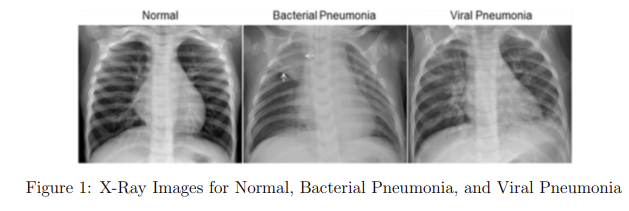

Typically, An X-Ray Image exam will allow Physician to check on lungs, heart, and blood
vessels to help determine if one have pneumonia. When interpreting the X-Ray, the radiologist will look for white spots in the lungs (called infiltrates) that identify an infection. Such exams will also help determine if one have any complications related to pneumonia such as abscesses or
pleural effusions (fluid surrounding the lungs).
This project aim to identify the infection of Pneumonia by deep learning methods, more specifically focusing on computer vision.

## 2 Dataset

The dataset is organized into 3 directories (train, test, val) and contains sub-directories for each
image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories
(Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou.
All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality
control by removing all low quality or unreadable scans. The diagnoses for the images were then
graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.
Download Link: https://ltu.box.com/s/ywboito9frcx5w4c4mzrrrl4qf2rh9u3

## 3 Task
Train the Convolutional Neural Networks model to classify the X-Ray images for pneumonia and
non-pneumonia categories. Major the performance in terms of accuracy and F-score. An Accuracy of 80% on test set is achievable for this task and soft target is in range of 70% and above.
In order to work on this project, any deep learning libraries and frameworks can be used.
however followings are the suggestions:

PyTorch, Tensorflow, Keras

Following tools can be used to visualize the results and other insights of experiments:

TensorBoard
Weights & Biases

## 4 Deliverables
Following are the deliverables of project for each group:
1. Project source code, trained model, and evaluation script on test set on GitHub repository.
The link of GitHub repository needs to share and refer during presentation.
2. 10 Minutes Project Presentation (4 to 5 slides) which typically includes methods, implementation, results, and learning outcome.


# -----------------------------------
### You
Is there a pretrained model for xray images? I have a dataset with xray of lungs where they are normal or pnemounia

### ChatGPT
Yes, there are several pretrained models for analyzing X-ray images, particularly for tasks like detecting pneumonia or other abnormalities in lung X-rays. One popular pretrained model for this task is the CheXNet model, which was trained on a large dataset of chest X-rays to detect common thoracic diseases. You can fine-tune models like CheXNet on your own dataset of normal and pneumonia X-ray images to adapt them to your specific task.

# Uppdatering
Vi bör använda oss utav DenseNet121 som pretrained model

In [3]:
device = cuda.get_current_device()
device.reset()
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% ! important; }<style>"))

# Vad vill vi använda oss utav för library? Samt arbetssätt

Oscars idé: Vi delar på oss och kör två olika, en subgrupp kör på pytorch, den andra keras. (förslagsvis Oscar och Andreas på keras då de har erfarenhet i deras andra kurs). Det blir en intern tävling på vilka som får bäst resultat på val set, dvs INTE testset.
Eftersom Markus alltid säger att man inte borde köra på testset förrän man är riktigt nöjd med sin modell bör vi utgå från detta och inte röra testset förrän vi är nöjda med vårt project.

# Saker att tänka på
1. Ladda in som vi gjorde i retina project
2. densenet är 3 kanalig, gör om våra till 3 om de är 1.
3. Kan vi ba flippa bilderna och få dubbel data?
4. Normalizera eller ej?
5.

In [2]:
import torch  # PyTorch deep learning library
import torch.nn as nn  # Neural network module in PyTorch
from torch.utils.data import DataLoader  # DataLoader for handling datasets in PyTorch
from torchvision import datasets, transforms  # Modules for loading datasets and image transformations
import matplotlib.pyplot as plt  # Matplotlib's plotting module
import numpy as np  # NumPy for numerical computing
import itertools  # Standard library module for creating iterators

import time  # Standard library module for time-related tasks
from matplotlib.animation import FuncAnimation  # For creating animations in Matplotlib
from IPython.display import Image  # For displaying images within the IPython environment

# Importing libraries for data splitting and handling
from sklearn.model_selection import train_test_split  # Function for splitting datasets
import pandas as pd  # Pandas for data manipulation and analysis
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
from torchvision import transforms
from torchvision.datasets import ImageFolder
from tensorflow.keras.applications import DenseNet121
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from keras.utils  import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from numba import cuda 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC, FalsePositives, FalseNegatives
from sklearn.metrics import balanced_accuracy_score
import random

In [3]:
#### Set up tests to know if we are running Colab or Kaggle
import sys

### Is this notebook running on Colab?
IS_COLAB = "google.colab" in sys.modules

### Is this notebook running on Kaggle?
# Fool Kaggle into making kaggle_secrets avaiable
try:
    import kaggle_secrets
except ImportError as e:
    pass
# Now we can test for Kaggle
IS_KAGGLE = "kaggle_secrets" in sys.modules

In [4]:
# Set up Keras/Tensorflow framework
import os
os.environ["KERAS_BACKEND"] = "tensorflow" # Also tensorflow, jax,pytorch for Keras 3.0

import keras
print('Keras version:', keras.__version__)

# Import needed libraries
import tensorflow as tf
print('TensorFlow version:', tf.__version__)

Keras version: 2.10.0
TensorFlow version: 2.10.0


In [5]:
#### Test for GPU and determine what GPU we have
import sys
if not tf.config.list_physical_devices('GPU'):
     print("No GPU was detected. CNNs can be very slow without a GPU.")
     if IS_COLAB or IS_KAGGLE:
         print("Change runtime and select a GPU hardware accelerator.")
else:
     !nvidia-smi -L
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


GPU 0: NVIDIA GeForce RTX 2080 (UUID: GPU-390a00ad-f302-8ccd-6404-bbe9a76cf2c6)
1 Physical GPUs, 1 Logical GPUs


# Dataloader

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

# Loading for Keras

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input
from sklearn.model_selection import train_test_split

BATCH_SIZE = 16
NEWIMG_WIDTH = 120
NEWIMG_HEIGHT = 80

def ds_img_transform(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (NEWIMG_HEIGHT, NEWIMG_WIDTH))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Define paths to the dataset
train_path = "chest_xray-selected/train"
val_path = "chest_xray-selected/val"
test_path = "chest_xray-selected/test"

# Load and preprocess images using Dataset API
def load_and_preprocess_data(path):
    data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
    data_flow = data_generator.flow_from_directory(
        path,
        target_size=(NEWIMG_HEIGHT, NEWIMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='binary',  # Assuming binary classification
        shuffle=True
    )
    return data_flow

# Load and preprocess training, validation, and test data
train_generator = load_and_preprocess_data(train_path)
val_generator = load_and_preprocess_data(val_path)
test_generator = load_and_preprocess_data(test_path)

# Split the training data into training and validation
train_images, val_images, train_labels, val_labels = train_test_split(train_generator.filepaths,
                                                                      train_generator.labels,
                                                                      test_size=0.2,
                                                                      random_state=42)

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
#train_ds = tf.data.Dataset.from_tensor_slices((train_generator.filepaths, train_generator.labels))
#val_ds = tf.data.Dataset.from_tensor_slices((val_generator.filepaths, val_generator.labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_generator.filepaths, test_generator.labels))

# Map image transformation function and set up batching
train_ds = train_ds.map(ds_img_transform, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(ds_img_transform, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(ds_img_transform, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=BATCH_SIZE, drop_remainder=True)

class_names = list(train_generator.class_indices.keys())


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


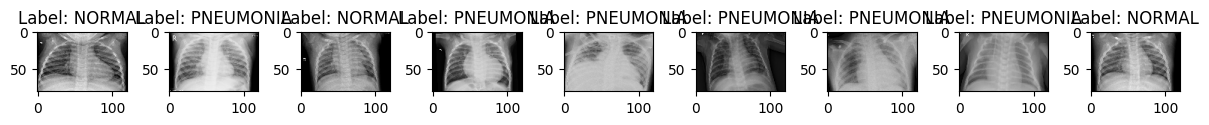

In [7]:
for ex_images, ex_labels in train_ds.take(1):  # Take just one batch
    break  # We've extracted what we need#### Print a few of the test data images

# Index of the images to plot (within the batch)
iix = [0,1,2,3,4,5,6,7,8]

plt.figure(figsize=(12, 12))  # Set a larger figure size

for i,ix in enumerate(iix):
    # Plot images
    plt.subplot(1,len(iix), i+1)
    plt.imshow(ex_images[ix])
    plt.title(f"Label: {class_names[ex_labels[ix]]}")
    print(ex_labels[ix])

plt.tight_layout()
plt.show()

# Start of ground up

In [61]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score
import numpy as np
class EarlyStoppingF1(Callback):
    def __init__(self, monitor='val_compute_f1_score', patience=0, mode='max', baseline=None, restore_best_weights=False):
        super(EarlyStoppingF1, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.mode = mode
        self.baseline = baseline
        self.restore_best_weights = restore_best_weights
        self.wait = 0
        if self.mode == 'max':
            self.monitor_op = np.greater
            self.best = -np.Inf
        elif self.mode == 'min':
            self.monitor_op = np.less
            self.best = np.Inf
        else:
            raise ValueError('Unrecognized mode: {}'.format(mode))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        if self.monitor not in logs:
            raise ValueError("Early stopping monitor '{}' not found in logs".format(self.monitor))
        
        current = logs.get(self.monitor)
        if current is None:
            return

        if self.monitor_op(current, self.best):
            self.best = current
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True

    def on_train_begin(self, logs=None):
        self.wait = 0
        self.stopped_epoch = 0


def compute_f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)  # Assuming binary classification
    return 2 * tf.reduce_sum(y_true * y_pred) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred))


In [100]:

# Take one sample from the training dataset
sample_image, _ = next(iter(train_ds))
# Get the shape of the sample image
input_shape = sample_image.shape[1:]  # Exclude batch dimension
print("Input shape", input_shape)
num_classes= 2
# The Keras model will be the simplest Keras model for NN networks.
# It is a single stack of layers connected sequentially.
model2 = Sequential([
    Conv2D(filters=20, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=10, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=230, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    #Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
]) 
model2.summary()

Input shape (80, 120, 3)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 80, 120, 20)       560       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 40, 60, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 40, 60, 10)        5010      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 20, 30, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 20, 30, 230)       20930     
                                                                 
 max_pooling2d_50 (MaxPoolin

In [101]:
# Compile the model, as a preparation for training
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy',compute_f1_score]
)

Epoch 1/30
260/260 [==============================] - 10s 39ms/step - loss: 0.2418 - accuracy: 0.9029 - compute_f1_score: 0.9353 - val_loss: 0.1212 - val_accuracy: 0.9558 - val_compute_f1_score: 0.9682
Epoch 2/30
260/260 [==============================] - 6s 24ms/step - loss: 0.1165 - accuracy: 0.9543 - compute_f1_score: 0.9676 - val_loss: 0.1072 - val_accuracy: 0.9625 - val_compute_f1_score: 0.9732
Epoch 3/30
260/260 [==============================] - 6s 24ms/step - loss: 0.0921 - accuracy: 0.9635 - compute_f1_score: 0.9738 - val_loss: 0.1143 - val_accuracy: 0.9577 - val_compute_f1_score: 0.9691
Epoch 4/30
260/260 [==============================] - 6s 24ms/step - loss: 0.0696 - accuracy: 0.9709 - compute_f1_score: 0.9795 - val_loss: 0.0876 - val_accuracy: 0.9702 - val_compute_f1_score: 0.9784
Epoch 5/30
260/260 [==============================] - 6s 24ms/step - loss: 0.0638 - accuracy: 0.9740 - compute_f1_score: 0.9812 - val_loss: 0.0933 - val_accuracy: 0.9663 - val_compute_f1_score: 0

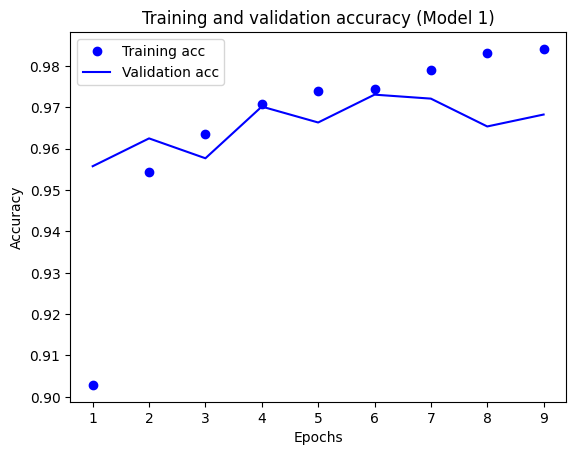

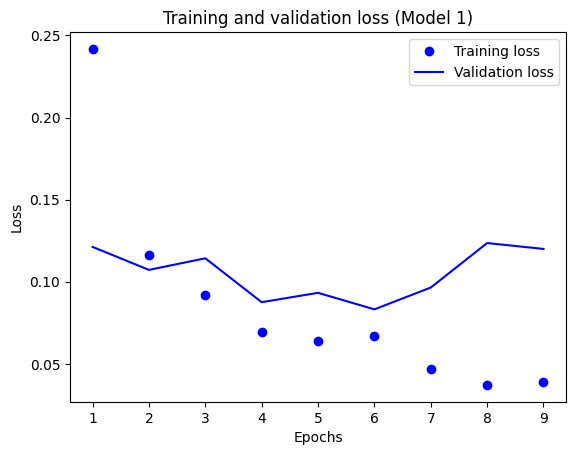

In [102]:

epochs = 30   ## Number of epoch to ru
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping_f1 = EarlyStoppingF1(patience=3, restore_best_weights=True)

# Train the model.
history = model2.fit(
  train_ds,
  epochs=epochs,
  batch_size=BATCH_SIZE,
  verbose = 1,
  validation_data=val_ds,
    callbacks=[early_stopping_f1]
)
epochrange = range(1, epochs + 1)
# Extracting training metrics
history_dict = history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Getting the number of epochs where training stopped due to early stopping
num_epochs = len(train_acc)

# Plotting accuracy
plt.plot(range(1, num_epochs + 1), train_acc, 'bo', label='Training acc')
plt.plot(range(1, num_epochs + 1), val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (Model 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(range(1, num_epochs + 1), train_loss, 'bo', label='Training loss')
plt.plot(range(1, num_epochs + 1), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (Model 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
#device = cuda.get_current_device()
#device.reset()

In [104]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# Assuming you have your model and test dataset ready
# model.predict returns the predicted probabilities for each class
y_pred_probabilities = model2.predict(test_ds)

# Convert predicted probabilities to class labels
threshold = 0.5
y_pred_labels = np.where(y_pred_probabilities > threshold, 1, 0)

# Get the true labels from the test dataset
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision
precision = precision_score(true_labels, y_pred_labels)
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, y_pred_labels)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(true_labels, y_pred_labels)
print("F1 Score:", f1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, y_pred_labels)
print("Accuracy:", accuracy)


39/39 [==============================] - 1s 27ms/step
Confusion Matrix:
[[122 112]
 [  4 386]]
Precision: 0.7751004016064257
Recall: 0.9897435897435898
F1 Score: 0.8693693693693694
Accuracy: 0.8141025641025641


In [105]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# Confusion Matrix values
confusion_matrices = [
    [[79, 155], [3, 387]],
    [[90, 144], [4, 386]],
    [[99, 135], [3, 387]],
    [[66, 168], [1, 389]],
    [[77, 157], [2, 388]],
    [[79, 155], [2, 388]],
    [[104, 130], [2, 388]],
    [[122, 112], [4, 386]]
]

# Precision, Recall, F1 Score, and Accuracy values
precisions = [0.7140221402214022, 0.7283018867924528, 0.7413793103448276, 0.6983842010771992, 0.7119266055045872, 0.714548802946593, 0.749034749034749, 0.7751004016064257]
recalls = [0.9923076923076923, 0.9897435897435898, 0.9923076923076923, 0.9974358974358974, 0.9948717948717949, 0.9948717948717949, 0.9948717948717949, 0.9897435897435898]
f1_scores = [0.8304721030042919, 0.8391304347826086, 0.8486842105263158, 0.8215417106652587, 0.8299465240641711, 0.8317256162915327, 0.854625550660793, 0.8693693693693694]
accuracies = [0.7467948717948718, 0.7628205128205128, 0.7788461538461539, 0.7291666666666666, 0.7451923076923077, 0.7483974358974359, 0.7884615384615384, 0.8141025641025641]

# Convert to numpy arrays for easier manipulation
confusion_matrices = np.array(confusion_matrices)
precisions = np.array(precisions)
recalls = np.array(recalls)
f1_scores = np.array(f1_scores)
accuracies = np.array(accuracies)

# Calculate the average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Calculate the average of each metric
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)
avg_accuracy = np.mean(accuracies)

print("Average Confusion Matrix:")
print(avg_confusion_matrix)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1_score)
print("Average Accuracy:", avg_accuracy)


Average Confusion Matrix:
[[ 89.5   144.5  ]
 [  2.625 387.375]]
Average Precision: 0.7290872621910296
Average Recall: 0.9932692307692308
Average F1 Score: 0.8406869399205427
Average Accuracy: 0.7642227564102564


In [ ]:
# Då man kör f1 score som early stopping 
Confusion Matrix:
[[ 79 155]
 [  3 387]]
Precision: 0.7140221402214022
Recall: 0.9923076923076923
F1 Score: 0.8304721030042919
Accuracy: 0.7467948717948718

Confusion Matrix:
[[ 90 144]
 [  4 386]]
Precision: 0.7283018867924528
Recall: 0.9897435897435898
F1 Score: 0.8391304347826086
Accuracy: 0.7628205128205128

Confusion Matrix:
[[ 99 135]
 [  3 387]]
Precision: 0.7413793103448276
Recall: 0.9923076923076923
F1 Score: 0.8486842105263158
Accuracy: 0.7788461538461539

Confusion Matrix:
[[ 66 168]
 [  1 389]]
Precision: 0.6983842010771992
Recall: 0.9974358974358974
F1 Score: 0.8215417106652587
Accuracy: 0.7291666666666666

Confusion Matrix:
[[ 77 157]
 [  2 388]]
Precision: 0.7119266055045872
Recall: 0.9948717948717949
F1 Score: 0.8299465240641711
Accuracy: 0.7451923076923077

Confusion Matrix:
[[ 79 155]
 [  2 388]]
Precision: 0.714548802946593
Recall: 0.9948717948717949
F1 Score: 0.8317256162915327
Accuracy: 0.7483974358974359

Confusion Matrix:
[[104 130]
 [  2 388]]
Precision: 0.749034749034749
Recall: 0.9948717948717949
F1 Score: 0.854625550660793
Accuracy: 0.7884615384615384

Confusion Matrix:
[[122 112]
 [  4 386]]
Precision: 0.7751004016064257
Recall: 0.9897435897435898
F1 Score: 0.8693693693693694
Accuracy: 0.8141025641025641

In [106]:
# avarage för data nedan
# Confusion Matrix values
confusion_matrices = [
    [[86, 148], [2, 388]],
    [[99, 135], [3, 387]],
    [[84, 150], [3, 387]],
    [[88, 146], [5, 385]],
    [[80, 154], [1, 389]],
    [[98, 136], [4, 386]],
    [[87, 147], [3, 387]],
    [[88, 146], [1, 389]]
]
# Convert to numpy array for easier manipulation
confusion_matrices = np.array(confusion_matrices)

# Calculate the sum of all confusion matrices
sum_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Divide each element by the number of runs to get the average
num_runs = len(confusion_matrices)
avg_confusion_matrix = sum_confusion_matrix / num_runs

print("Average Confusion Matrix:")
print(avg_confusion_matrix)
# Precision, Recall, F1 Score, and Accuracy values
precisions = [0.7238805970149254, 0.7413793103448276, 0.7206703910614525, 0.7250470809792844, 0.716390423572744, 0.7394636015325671, 0.7247191011235955, 0.7271028037383177]
recalls = [0.9948717948717949, 0.9923076923076923, 0.9923076923076923, 0.9871794871794872, 0.9974358974358974, 0.9897435897435898, 0.9923076923076923, 0.9974358974358974]
f1_scores = [0.838012958963283, 0.8486842105263158, 0.8349514563106796, 0.8360477741585234, 0.8338692390139334, 0.8464912280701754, 0.8376623376623376, 0.8410810810810811]
accuracies = [0.7596153846153846, 0.7788461538461539, 0.7548076923076923, 0.7580128205128205, 0.7516025641025641, 0.7756410256410257, 0.7596153846153846, 0.7644230769230769]

# Calculate the average of each metric
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)
avg_accuracy = np.mean(accuracies)

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1_score)
print("Average Accuracy:", avg_accuracy)


Average Confusion Matrix:
[[ 88.75 145.25]
 [  2.75 387.25]]
Average Precision: 0.7273316636709642
Average Recall: 0.992948717948718
Average F1 Score: 0.8396000357232911
Average Accuracy: 0.7628205128205128


In [30]:
# Då man kör loss som early stopping
Confusion Matrix:
[[ 86 148]
 [  2 388]]
Precision: 0.7238805970149254
Recall: 0.9948717948717949
F1 Score: 0.838012958963283
Accuracy: 0.7596153846153846

[[ 99 135]
 [  3 387]]
Precision: 0.7413793103448276
Recall: 0.9923076923076923
F1 Score: 0.8486842105263158
Accuracy: 0.7788461538461539

Confusion Matrix:
[[ 84 150]
 [  3 387]]
Precision: 0.7206703910614525
Recall: 0.9923076923076923
F1 Score: 0.8349514563106796
Accuracy: 0.7548076923076923

Confusion Matrix:
[[ 88 146]
 [  5 385]]
Precision: 0.7250470809792844
Recall: 0.9871794871794872
F1 Score: 0.8360477741585234
Accuracy: 0.7580128205128205

Confusion Matrix:
[[ 80 154]
 [  1 389]]
Precision: 0.716390423572744
Recall: 0.9974358974358974
F1 Score: 0.8338692390139334
Accuracy: 0.7516025641025641

Confusion Matrix:
[[ 98 136]
 [  4 386]]
Precision: 0.7394636015325671
Recall: 0.9897435897435898
F1 Score: 0.8464912280701754
Accuracy: 0.7756410256410257

Confusion Matrix:
[[ 87 147]
 [  3 387]]
Precision: 0.7247191011235955
Recall: 0.9923076923076923
F1 Score: 0.8376623376623376
Accuracy: 0.7596153846153846

Confusion Matrix:
[[ 88 146]
 [  1 389]]
Precision: 0.7271028037383177
Recall: 0.9974358974358974
F1 Score: 0.8410810810810811
Accuracy: 0.7644230769230769

SyntaxError: invalid syntax (1761949236.py, line 1)

# Trying my own "tuner"

In [86]:
# Variables to randomize from
conv_filters = np.arange(10,261,10)
print(conv_filters)
conv_kernels = np.arange(3,6)
print(conv_kernels)
#dropouts = np.arange(0,0.51,0.1)
#print(dropouts)
total_layers = np.arange(1,6)

print(random.choice(conv_kernels))

[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260]
[3 4 5]
5


In [87]:
# Take one sample from the training dataset
sample_image, _ = next(iter(train_ds))
# Get the shape of the sample image
input_shape = sample_image.shape[1:]  # Exclude batch dimension
def build_a_random_model():
    parameters = []
    model = keras.Sequential()
    conv_kernel = random.choice(conv_kernels)
    conv_filter = random.choice(conv_filters)
    parameters.append(conv_filter)
    parameters.append((conv_kernel,conv_kernel))
    model.add(Conv2D(filters=conv_filter,
        kernel_size=(conv_kernel,conv_kernel),
        activation='relu',
        padding='same', input_shape=input_shape))    
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))
    no_layers = random.choice(total_layers)
    parameters.append((2,2))
    
    parameters.append(no_layers)
    for i in range(no_layers):
        conv_kernel = random.choice(conv_kernels)
        conv_filter = random.choice(conv_filters)
        model.add(Conv2D(filters=conv_filter,
            kernel_size=(conv_kernel,conv_kernel),
            activation='relu',
            padding='valid'))    
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))
        parameters.append(conv_filter)
        parameters.append((conv_kernel,conv_kernel))
        parameters.append((2,2))
    model.add(keras.layers.Flatten())
    #model.add(keras.layers.Dense(
    #    units=hp.Int('dense_1_units', min_value=32, max_value=256, step=32),
    #    activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    return model,parameters

In [88]:
# print out av parametrar
built_model, parameters = build_a_random_model()
print(parameters)
print(built_model.summary())

[230, (3, 3), (2, 2), 1, 200, (5, 5), (2, 2)]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 80, 120, 230)      6440      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 79, 119, 230)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 75, 115, 200)      1150200   
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 74, 114, 200)     0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1687200)           0         
                                                                 
 dense_1

In [103]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score
import numpy as np
class EarlyStoppingF1(Callback):
    def __init__(self, monitor='val_compute_f1_score', patience=0, mode='max', baseline=None, restore_best_weights=False):
        super(EarlyStoppingF1, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.mode = mode
        self.baseline = baseline
        self.restore_best_weights = restore_best_weights
        self.wait = 0
        if self.mode == 'max':
            self.monitor_op = np.greater
            self.best = -np.Inf
        elif self.mode == 'min':
            self.monitor_op = np.less
            self.best = np.Inf
        else:
            raise ValueError('Unrecognized mode: {}'.format(mode))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        if self.monitor not in logs:
            raise ValueError("Early stopping monitor '{}' not found in logs".format(self.monitor))
        
        current = logs.get(self.monitor)
        if current is None:
            return

        if self.monitor_op(current, self.best):
            self.best = current
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True

    def on_train_begin(self, logs=None):
        self.wait = 0
        self.stopped_epoch = 0


def compute_f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)  # Assuming binary classification
    return 2 * tf.reduce_sum(y_true * y_pred) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred))


# Number of hyperparameter combinations to test
MAX_TRIALS = 100  

saved_models = []
for i in range(MAX_TRIALS):
    built_model, parameters = build_a_random_model()
    print(parameters)
    built_model.compile(
          optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy',compute_f1_score]
        )
    epochs = 10   ## Number of epochs to run
    
 
    early_stopping_f1 = EarlyStoppingF1(patience=3, restore_best_weights=True)

    # Train the model.
    history = built_model.fit(
        train_ds,
        epochs=epochs,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=val_ds,
        callbacks=[early_stopping_f1]
    )

    history_dict = history.history
    saved_models.append((built_model, parameters, history_dict))
    
    # Clear the console
    os.system('cls')
    print("trial", i+1)


[20, (3, 3), (2, 2), 2, 10, (5, 5), (2, 2), 230, (3, 3), (2, 2)]
Epoch 1/10
260/260 [==============================] - 11s 40ms/step - loss: 0.3537 - accuracy: 0.9113 - compute_f1_score: 0.9380 - val_loss: 0.1126 - val_accuracy: 0.9606 - val_compute_f1_score: 0.9723
Epoch 2/10
260/260 [==============================] - 10s 38ms/step - loss: 0.1323 - accuracy: 0.9514 - compute_f1_score: 0.9658 - val_loss: 0.1636 - val_accuracy: 0.9433 - val_compute_f1_score: 0.9587
Epoch 3/10
260/260 [==============================] - 10s 39ms/step - loss: 0.0909 - accuracy: 0.9683 - compute_f1_score: 0.9775 - val_loss: 0.0984 - val_accuracy: 0.9644 - val_compute_f1_score: 0.9751
Epoch 4/10
260/260 [==============================] - 10s 38ms/step - loss: 0.0630 - accuracy: 0.9774 - compute_f1_score: 0.9839 - val_loss: 0.1177 - val_accuracy: 0.9625 - val_compute_f1_score: 0.9737
Epoch 5/10
260/260 [==============================] - 10s 40ms/step - loss: 0.0489 - accuracy: 0.9822 - compute_f1_score: 0.987

In [109]:
print(saved_models[0])

(<keras.engine.sequential.Sequential object at 0x00000289CB952FA0>, [20, (3, 3), (2, 2), 2, 10, (5, 5), (2, 2), 230, (3, 3), (2, 2)], {'loss': [0.35372400283813477, 0.1322908103466034, 0.09088253974914551, 0.0629606619477272, 0.04892803356051445, 0.04150780662894249, 0.03890002891421318, 0.03021787293255329, 0.023595839738845825], 'accuracy': [0.9112980961799622, 0.951442301273346, 0.9682692289352417, 0.9774038195610046, 0.9822115302085876, 0.9846153855323792, 0.9846153855323792, 0.9872596263885498, 0.9918269515037537], 'compute_f1_score': [0.9380496740341187, 0.9657961130142212, 0.9774666428565979, 0.9839187860488892, 0.9871826171875, 0.9887237548828125, 0.9893484115600586, 0.9910090565681458, 0.9941982626914978], 'val_loss': [0.11256714165210724, 0.16357280313968658, 0.09839964658021927, 0.1176547184586525, 0.19089671969413757, 0.14167819917201996, 0.17546284198760986, 0.18586286902427673, 0.15384429693222046], 'val_accuracy': [0.9605769515037537, 0.9432692527770996, 0.96442306041717

In [32]:
import pickle

# Save variable to file
with open('variable.pkl', 'wb') as f:
    pickle.dump(saved_models, f)

INFO:tensorflow:Assets written to: ram://0199aa27-3650-49e6-83d8-66182678f035/assets


INFO:tensorflow:Assets written to: ram://0199aa27-3650-49e6-83d8-66182678f035/assets


INFO:tensorflow:Assets written to: ram://8fc69e5a-ca3e-46a2-9d42-d88a75208536/assets


INFO:tensorflow:Assets written to: ram://8fc69e5a-ca3e-46a2-9d42-d88a75208536/assets


INFO:tensorflow:Assets written to: ram://0aa641d1-6103-4405-ade1-0dbaef8fb038/assets


INFO:tensorflow:Assets written to: ram://0aa641d1-6103-4405-ade1-0dbaef8fb038/assets


INFO:tensorflow:Assets written to: ram://8bd2b33f-f0b1-4879-9833-29d843810057/assets


INFO:tensorflow:Assets written to: ram://8bd2b33f-f0b1-4879-9833-29d843810057/assets


INFO:tensorflow:Assets written to: ram://5554c0cd-c261-436b-97ea-578de7dd07da/assets


INFO:tensorflow:Assets written to: ram://5554c0cd-c261-436b-97ea-578de7dd07da/assets


INFO:tensorflow:Assets written to: ram://e9bcb8b6-dd9a-4f12-9e2a-aac3ca5d9870/assets


INFO:tensorflow:Assets written to: ram://e9bcb8b6-dd9a-4f12-9e2a-aac3ca5d9870/assets


INFO:tensorflow:Assets written to: ram://7bee92a4-eae9-4e11-863a-e83b9793d246/assets


INFO:tensorflow:Assets written to: ram://7bee92a4-eae9-4e11-863a-e83b9793d246/assets


INFO:tensorflow:Assets written to: ram://ae79fa46-b9b3-4da5-a343-168123eb46d2/assets


INFO:tensorflow:Assets written to: ram://ae79fa46-b9b3-4da5-a343-168123eb46d2/assets


INFO:tensorflow:Assets written to: ram://55e10aaf-4d7f-4031-ad30-ebe1f898c06c/assets


INFO:tensorflow:Assets written to: ram://55e10aaf-4d7f-4031-ad30-ebe1f898c06c/assets


INFO:tensorflow:Assets written to: ram://d1d22284-213e-4f68-9089-0da7c980b5ec/assets


INFO:tensorflow:Assets written to: ram://d1d22284-213e-4f68-9089-0da7c980b5ec/assets


INFO:tensorflow:Assets written to: ram://6234d8ba-d2b2-4103-a31d-335a42d357e4/assets


INFO:tensorflow:Assets written to: ram://6234d8ba-d2b2-4103-a31d-335a42d357e4/assets


INFO:tensorflow:Assets written to: ram://0f840e3a-9f8c-4d35-9f71-ec91a1301ba5/assets


INFO:tensorflow:Assets written to: ram://0f840e3a-9f8c-4d35-9f71-ec91a1301ba5/assets


INFO:tensorflow:Assets written to: ram://bbfed467-10f8-4502-830b-3cd3189bac73/assets


INFO:tensorflow:Assets written to: ram://bbfed467-10f8-4502-830b-3cd3189bac73/assets


INFO:tensorflow:Assets written to: ram://0f65aae2-f064-48f6-ae87-9ae073685681/assets


INFO:tensorflow:Assets written to: ram://0f65aae2-f064-48f6-ae87-9ae073685681/assets


INFO:tensorflow:Assets written to: ram://bdf73569-521c-4724-bc58-d04792be2ec1/assets


INFO:tensorflow:Assets written to: ram://bdf73569-521c-4724-bc58-d04792be2ec1/assets


INFO:tensorflow:Assets written to: ram://bc316eb9-c667-47ce-862f-abeb8b8987a2/assets


INFO:tensorflow:Assets written to: ram://bc316eb9-c667-47ce-862f-abeb8b8987a2/assets


INFO:tensorflow:Assets written to: ram://8b265cae-b919-4d1f-8dc4-5427a4a057e2/assets


INFO:tensorflow:Assets written to: ram://8b265cae-b919-4d1f-8dc4-5427a4a057e2/assets


INFO:tensorflow:Assets written to: ram://62a481d9-3732-4cc2-9ca1-029ba4356c00/assets


INFO:tensorflow:Assets written to: ram://62a481d9-3732-4cc2-9ca1-029ba4356c00/assets


INFO:tensorflow:Assets written to: ram://289a8f02-3572-476c-bd5f-d3a7b33ef164/assets


INFO:tensorflow:Assets written to: ram://289a8f02-3572-476c-bd5f-d3a7b33ef164/assets


INFO:tensorflow:Assets written to: ram://f047c9f6-9368-4dee-8dbe-821160569118/assets


INFO:tensorflow:Assets written to: ram://f047c9f6-9368-4dee-8dbe-821160569118/assets


INFO:tensorflow:Assets written to: ram://f1be995e-d157-4b50-b4e3-d5422dbd17e8/assets


INFO:tensorflow:Assets written to: ram://f1be995e-d157-4b50-b4e3-d5422dbd17e8/assets


INFO:tensorflow:Assets written to: ram://f270ec05-9865-4d9d-8d65-19049030e518/assets


INFO:tensorflow:Assets written to: ram://f270ec05-9865-4d9d-8d65-19049030e518/assets


INFO:tensorflow:Assets written to: ram://be7c64f8-d96f-49dc-b3e8-731e3a094ed0/assets


INFO:tensorflow:Assets written to: ram://be7c64f8-d96f-49dc-b3e8-731e3a094ed0/assets


INFO:tensorflow:Assets written to: ram://54e5646c-119c-4ed2-8521-fa7b7ff8ee51/assets


INFO:tensorflow:Assets written to: ram://54e5646c-119c-4ed2-8521-fa7b7ff8ee51/assets


INFO:tensorflow:Assets written to: ram://59db83ae-949a-498f-ad0f-b3d4d25b8033/assets


INFO:tensorflow:Assets written to: ram://59db83ae-949a-498f-ad0f-b3d4d25b8033/assets


INFO:tensorflow:Assets written to: ram://9cafd3fa-1771-41b1-a5ad-d013373eef4d/assets


INFO:tensorflow:Assets written to: ram://9cafd3fa-1771-41b1-a5ad-d013373eef4d/assets


INFO:tensorflow:Assets written to: ram://7f03e348-4e66-4b96-ab95-1383cc7b3e5d/assets


INFO:tensorflow:Assets written to: ram://7f03e348-4e66-4b96-ab95-1383cc7b3e5d/assets


INFO:tensorflow:Assets written to: ram://fcb6136c-ae9a-4ba4-b5eb-5baf893dd9da/assets


INFO:tensorflow:Assets written to: ram://fcb6136c-ae9a-4ba4-b5eb-5baf893dd9da/assets


INFO:tensorflow:Assets written to: ram://315f68a2-8470-4de3-961a-95d65e0a1368/assets


INFO:tensorflow:Assets written to: ram://315f68a2-8470-4de3-961a-95d65e0a1368/assets


INFO:tensorflow:Assets written to: ram://27babec0-dc11-4f6c-a7cf-571d6482e979/assets


INFO:tensorflow:Assets written to: ram://27babec0-dc11-4f6c-a7cf-571d6482e979/assets


INFO:tensorflow:Assets written to: ram://76a16edb-8703-40fd-b126-1cc43608cc25/assets


INFO:tensorflow:Assets written to: ram://76a16edb-8703-40fd-b126-1cc43608cc25/assets


INFO:tensorflow:Assets written to: ram://9b0407ec-2b11-4ca7-a9f4-0454b2d5a19b/assets


INFO:tensorflow:Assets written to: ram://9b0407ec-2b11-4ca7-a9f4-0454b2d5a19b/assets


INFO:tensorflow:Assets written to: ram://651b381a-863c-4e1c-90ff-8a60df3dc003/assets


INFO:tensorflow:Assets written to: ram://651b381a-863c-4e1c-90ff-8a60df3dc003/assets


INFO:tensorflow:Assets written to: ram://2d67bf19-27c1-4a85-a717-2dd4d59a60f5/assets


INFO:tensorflow:Assets written to: ram://2d67bf19-27c1-4a85-a717-2dd4d59a60f5/assets


INFO:tensorflow:Assets written to: ram://90bac294-71a2-4f65-b2cb-c5c1efdbbfca/assets


INFO:tensorflow:Assets written to: ram://90bac294-71a2-4f65-b2cb-c5c1efdbbfca/assets


INFO:tensorflow:Assets written to: ram://608567c2-94c3-4d9a-b893-3151cabb329f/assets


INFO:tensorflow:Assets written to: ram://608567c2-94c3-4d9a-b893-3151cabb329f/assets


INFO:tensorflow:Assets written to: ram://1064f89e-7f0e-4246-a3bf-61f6d3781f92/assets


INFO:tensorflow:Assets written to: ram://1064f89e-7f0e-4246-a3bf-61f6d3781f92/assets


INFO:tensorflow:Assets written to: ram://4b3de24a-d0f6-476a-8fb1-aaa4d7cb2180/assets


INFO:tensorflow:Assets written to: ram://4b3de24a-d0f6-476a-8fb1-aaa4d7cb2180/assets


INFO:tensorflow:Assets written to: ram://8f582b85-47ac-4fd5-bb49-2c805f17f106/assets


INFO:tensorflow:Assets written to: ram://8f582b85-47ac-4fd5-bb49-2c805f17f106/assets


INFO:tensorflow:Assets written to: ram://4a9d4f44-99e6-4af6-81cc-3709b17736a0/assets


INFO:tensorflow:Assets written to: ram://4a9d4f44-99e6-4af6-81cc-3709b17736a0/assets


INFO:tensorflow:Assets written to: ram://27991626-95fb-48d4-8c07-e02cb3f23e24/assets


INFO:tensorflow:Assets written to: ram://27991626-95fb-48d4-8c07-e02cb3f23e24/assets


INFO:tensorflow:Assets written to: ram://3ad93277-432d-4410-83da-330e88c05592/assets


INFO:tensorflow:Assets written to: ram://3ad93277-432d-4410-83da-330e88c05592/assets


INFO:tensorflow:Assets written to: ram://aaffa2eb-c6e3-48ce-ae0b-ae6128f0bd0c/assets


INFO:tensorflow:Assets written to: ram://aaffa2eb-c6e3-48ce-ae0b-ae6128f0bd0c/assets


INFO:tensorflow:Assets written to: ram://0d4a34f4-7392-4459-84fa-0261d0ea1d3e/assets


INFO:tensorflow:Assets written to: ram://0d4a34f4-7392-4459-84fa-0261d0ea1d3e/assets


INFO:tensorflow:Assets written to: ram://55f5217e-3206-4d94-b021-e9bf5b26bcd9/assets


INFO:tensorflow:Assets written to: ram://55f5217e-3206-4d94-b021-e9bf5b26bcd9/assets


INFO:tensorflow:Assets written to: ram://d1919746-2cda-4a7b-85d5-3ffc26cb4423/assets


INFO:tensorflow:Assets written to: ram://d1919746-2cda-4a7b-85d5-3ffc26cb4423/assets


INFO:tensorflow:Assets written to: ram://33e1afd5-5b02-4548-8113-6af8bcbf0e80/assets


INFO:tensorflow:Assets written to: ram://33e1afd5-5b02-4548-8113-6af8bcbf0e80/assets


INFO:tensorflow:Assets written to: ram://a8877735-e2b9-482a-9ae8-07134ce54e6d/assets


INFO:tensorflow:Assets written to: ram://a8877735-e2b9-482a-9ae8-07134ce54e6d/assets


INFO:tensorflow:Assets written to: ram://158ea30e-9b7c-4ccc-abf7-ddd4f2c31c04/assets


INFO:tensorflow:Assets written to: ram://158ea30e-9b7c-4ccc-abf7-ddd4f2c31c04/assets


INFO:tensorflow:Assets written to: ram://46f578b9-d310-4784-a803-f5e646773b4f/assets


INFO:tensorflow:Assets written to: ram://46f578b9-d310-4784-a803-f5e646773b4f/assets


INFO:tensorflow:Assets written to: ram://9b4b0254-2b66-4abf-877b-07cc47c6f643/assets


INFO:tensorflow:Assets written to: ram://9b4b0254-2b66-4abf-877b-07cc47c6f643/assets


INFO:tensorflow:Assets written to: ram://35015318-8862-4d2c-b035-b3553015a6d5/assets


INFO:tensorflow:Assets written to: ram://35015318-8862-4d2c-b035-b3553015a6d5/assets


INFO:tensorflow:Assets written to: ram://48b8c98b-037d-42b2-9fa0-8481edda22d1/assets


INFO:tensorflow:Assets written to: ram://48b8c98b-037d-42b2-9fa0-8481edda22d1/assets


INFO:tensorflow:Assets written to: ram://ea525ba1-28be-43d2-85e4-7e3eb085ca5b/assets


INFO:tensorflow:Assets written to: ram://ea525ba1-28be-43d2-85e4-7e3eb085ca5b/assets


INFO:tensorflow:Assets written to: ram://3fe499f8-7648-4aab-8a63-363050b84303/assets


INFO:tensorflow:Assets written to: ram://3fe499f8-7648-4aab-8a63-363050b84303/assets


INFO:tensorflow:Assets written to: ram://7748a9f6-c96d-4656-b659-24abab1ebe5f/assets


INFO:tensorflow:Assets written to: ram://7748a9f6-c96d-4656-b659-24abab1ebe5f/assets


INFO:tensorflow:Assets written to: ram://2de38a61-192a-4795-aa43-94f62c8a3660/assets


INFO:tensorflow:Assets written to: ram://2de38a61-192a-4795-aa43-94f62c8a3660/assets


INFO:tensorflow:Assets written to: ram://a5b8bf98-c618-4819-a532-6e66bc1f8c50/assets


INFO:tensorflow:Assets written to: ram://a5b8bf98-c618-4819-a532-6e66bc1f8c50/assets


INFO:tensorflow:Assets written to: ram://d4bdd7be-8d42-450b-ba3f-a038d6762ee5/assets


INFO:tensorflow:Assets written to: ram://d4bdd7be-8d42-450b-ba3f-a038d6762ee5/assets


INFO:tensorflow:Assets written to: ram://a527b756-2804-4d12-9212-1823f395109f/assets


INFO:tensorflow:Assets written to: ram://a527b756-2804-4d12-9212-1823f395109f/assets


INFO:tensorflow:Assets written to: ram://d3872989-d706-411d-aea8-93f573ff8a66/assets


INFO:tensorflow:Assets written to: ram://d3872989-d706-411d-aea8-93f573ff8a66/assets


INFO:tensorflow:Assets written to: ram://c0cd3c6f-ad53-48bf-b479-41fdb905e27e/assets


INFO:tensorflow:Assets written to: ram://c0cd3c6f-ad53-48bf-b479-41fdb905e27e/assets


INFO:tensorflow:Assets written to: ram://3d9dd9f3-e8b2-4985-b7e9-334fff828f73/assets


INFO:tensorflow:Assets written to: ram://3d9dd9f3-e8b2-4985-b7e9-334fff828f73/assets


INFO:tensorflow:Assets written to: ram://1624c04e-4a35-4169-b288-e0e51eb97670/assets


INFO:tensorflow:Assets written to: ram://1624c04e-4a35-4169-b288-e0e51eb97670/assets


INFO:tensorflow:Assets written to: ram://231602ba-2162-4539-ba3d-0dd3e8ba94ae/assets


INFO:tensorflow:Assets written to: ram://231602ba-2162-4539-ba3d-0dd3e8ba94ae/assets


INFO:tensorflow:Assets written to: ram://469c7370-2afc-4dd2-ab29-9304665842ce/assets


INFO:tensorflow:Assets written to: ram://469c7370-2afc-4dd2-ab29-9304665842ce/assets


INFO:tensorflow:Assets written to: ram://0382f2ef-d127-4d71-b15b-6649b4a6d73e/assets


INFO:tensorflow:Assets written to: ram://0382f2ef-d127-4d71-b15b-6649b4a6d73e/assets


INFO:tensorflow:Assets written to: ram://cfbfb500-e30c-4915-9e80-a4bf3897834c/assets


INFO:tensorflow:Assets written to: ram://cfbfb500-e30c-4915-9e80-a4bf3897834c/assets


INFO:tensorflow:Assets written to: ram://c52d122f-51a2-449b-8428-d313cf34dd14/assets


INFO:tensorflow:Assets written to: ram://c52d122f-51a2-449b-8428-d313cf34dd14/assets


INFO:tensorflow:Assets written to: ram://19bda432-b84c-49e8-82ee-6fd3b57a6ded/assets


INFO:tensorflow:Assets written to: ram://19bda432-b84c-49e8-82ee-6fd3b57a6ded/assets


INFO:tensorflow:Assets written to: ram://ffa96f24-33fd-4442-96a7-bd6f1b751e5a/assets


INFO:tensorflow:Assets written to: ram://ffa96f24-33fd-4442-96a7-bd6f1b751e5a/assets


INFO:tensorflow:Assets written to: ram://6e4d5954-d5ad-4041-82ef-1db02921a082/assets


INFO:tensorflow:Assets written to: ram://6e4d5954-d5ad-4041-82ef-1db02921a082/assets


INFO:tensorflow:Assets written to: ram://3b979312-cb4e-42f3-bdfa-508a802d8803/assets


INFO:tensorflow:Assets written to: ram://3b979312-cb4e-42f3-bdfa-508a802d8803/assets


INFO:tensorflow:Assets written to: ram://b5c02b37-8d96-40a0-ac23-06256d1ebbd6/assets


INFO:tensorflow:Assets written to: ram://b5c02b37-8d96-40a0-ac23-06256d1ebbd6/assets


INFO:tensorflow:Assets written to: ram://95d82be3-d59f-41b9-bee7-2b93b7d12db3/assets


INFO:tensorflow:Assets written to: ram://95d82be3-d59f-41b9-bee7-2b93b7d12db3/assets


INFO:tensorflow:Assets written to: ram://a136fe81-35fe-4e0f-a16a-e892a19bd420/assets


INFO:tensorflow:Assets written to: ram://a136fe81-35fe-4e0f-a16a-e892a19bd420/assets


INFO:tensorflow:Assets written to: ram://2348fe29-eef4-4d4c-825a-b1bab0f4e755/assets


INFO:tensorflow:Assets written to: ram://2348fe29-eef4-4d4c-825a-b1bab0f4e755/assets


INFO:tensorflow:Assets written to: ram://e7185f0c-d54f-4907-a3f4-7e3fcd2ecf9c/assets


INFO:tensorflow:Assets written to: ram://e7185f0c-d54f-4907-a3f4-7e3fcd2ecf9c/assets


INFO:tensorflow:Assets written to: ram://12485e6a-2f82-453d-bd3b-d5180f582b2d/assets


INFO:tensorflow:Assets written to: ram://12485e6a-2f82-453d-bd3b-d5180f582b2d/assets


INFO:tensorflow:Assets written to: ram://e0c0cc8f-6fe0-4260-a2a1-95cd9a2bbae0/assets


INFO:tensorflow:Assets written to: ram://e0c0cc8f-6fe0-4260-a2a1-95cd9a2bbae0/assets


INFO:tensorflow:Assets written to: ram://3f762e69-730e-49a3-820e-297b49711545/assets


INFO:tensorflow:Assets written to: ram://3f762e69-730e-49a3-820e-297b49711545/assets


INFO:tensorflow:Assets written to: ram://9f097ffb-06fd-4d08-8ac4-e6c2ab2d3963/assets


INFO:tensorflow:Assets written to: ram://9f097ffb-06fd-4d08-8ac4-e6c2ab2d3963/assets


INFO:tensorflow:Assets written to: ram://2e85d9ab-8a97-4650-9889-fdc712e1f442/assets


INFO:tensorflow:Assets written to: ram://2e85d9ab-8a97-4650-9889-fdc712e1f442/assets


INFO:tensorflow:Assets written to: ram://d3eb04a9-4500-4e0c-9509-a047ab011d19/assets


INFO:tensorflow:Assets written to: ram://d3eb04a9-4500-4e0c-9509-a047ab011d19/assets


INFO:tensorflow:Assets written to: ram://efe482a4-3609-48b5-b470-fe899d76a56e/assets


INFO:tensorflow:Assets written to: ram://efe482a4-3609-48b5-b470-fe899d76a56e/assets


INFO:tensorflow:Assets written to: ram://410780f9-8a30-4a40-92a3-98f40c7dc187/assets


INFO:tensorflow:Assets written to: ram://410780f9-8a30-4a40-92a3-98f40c7dc187/assets


INFO:tensorflow:Assets written to: ram://ec988414-d594-4c6a-a585-bd7a52ccd394/assets


INFO:tensorflow:Assets written to: ram://ec988414-d594-4c6a-a585-bd7a52ccd394/assets


INFO:tensorflow:Assets written to: ram://0fde3295-1574-4f57-8402-7e14ed6abdd3/assets


INFO:tensorflow:Assets written to: ram://0fde3295-1574-4f57-8402-7e14ed6abdd3/assets


INFO:tensorflow:Assets written to: ram://cdf9ca26-b8dd-4bd0-9d58-bca39af62610/assets


INFO:tensorflow:Assets written to: ram://cdf9ca26-b8dd-4bd0-9d58-bca39af62610/assets


INFO:tensorflow:Assets written to: ram://8ba37d12-8355-4aca-b1ab-a76a82278c05/assets


INFO:tensorflow:Assets written to: ram://8ba37d12-8355-4aca-b1ab-a76a82278c05/assets


INFO:tensorflow:Assets written to: ram://42fc0c21-49ac-4dbe-a23b-62a5c50b5e99/assets


INFO:tensorflow:Assets written to: ram://42fc0c21-49ac-4dbe-a23b-62a5c50b5e99/assets


INFO:tensorflow:Assets written to: ram://fcd0e571-dd47-4843-b8c2-660e309543e8/assets


INFO:tensorflow:Assets written to: ram://fcd0e571-dd47-4843-b8c2-660e309543e8/assets


INFO:tensorflow:Assets written to: ram://19663adf-f54f-443c-896a-1885edc9f6a1/assets


INFO:tensorflow:Assets written to: ram://19663adf-f54f-443c-896a-1885edc9f6a1/assets


INFO:tensorflow:Assets written to: ram://b04f0d50-1e1c-4b10-b002-d9554867576a/assets


INFO:tensorflow:Assets written to: ram://b04f0d50-1e1c-4b10-b002-d9554867576a/assets


INFO:tensorflow:Assets written to: ram://0dc4c11d-cd42-4ce8-866d-3665c56d094b/assets


INFO:tensorflow:Assets written to: ram://0dc4c11d-cd42-4ce8-866d-3665c56d094b/assets


INFO:tensorflow:Assets written to: ram://c13eb722-49df-4df9-a583-2e577b6f0a2a/assets


INFO:tensorflow:Assets written to: ram://c13eb722-49df-4df9-a583-2e577b6f0a2a/assets


INFO:tensorflow:Assets written to: ram://e1afc1cd-87fe-4e74-b8b9-f903f79d9e36/assets


INFO:tensorflow:Assets written to: ram://e1afc1cd-87fe-4e74-b8b9-f903f79d9e36/assets


INFO:tensorflow:Assets written to: ram://6d28e180-e16c-47bd-a5a7-338dc011e6ab/assets


INFO:tensorflow:Assets written to: ram://6d28e180-e16c-47bd-a5a7-338dc011e6ab/assets


INFO:tensorflow:Assets written to: ram://9bf812a8-60a5-47df-9e65-d2ea3948b4a3/assets


INFO:tensorflow:Assets written to: ram://9bf812a8-60a5-47df-9e65-d2ea3948b4a3/assets


INFO:tensorflow:Assets written to: ram://10ab5e0c-e5d9-45ef-9883-9ab9c4e7cd73/assets


INFO:tensorflow:Assets written to: ram://10ab5e0c-e5d9-45ef-9883-9ab9c4e7cd73/assets


In [108]:
min_val_loss = 0
best_index = 0
index = 0
for model in saved_models:
    if np.max(model[-1]["val_compute_f1_score"]) > min_val_loss:
        min_val_loss = np.max(model[-1]["val_compute_f1_score"])
        best_index = index
    index+=1
print(best_index)

0


# Start of tuner

In [46]:
# Get Keras Tuner (if in colab or kaggle)
if (IS_COLAB or IS_KAGGLE):
  !pip install keras_tuner -q
import keras_tuner
print('Keras Tuner version:', keras_tuner.__version__)

# Get some tuner search functions
from keras_tuner.tuners import BayesianOptimization


Keras Tuner version: 1.4.7


In [47]:
# Din kod för en keras tuner modell som har antalet lager som en hyperparameter
# och där du söker efter optimerade hyperparametrar för denna modell.
# Kompletera denna kod med din modell
def build_model_MyModel(hp):
    model = keras.Sequential()
    model.add(Conv2D(filters=hp.Int('conv__filter', min_value=10, max_value=260, step=10),
        kernel_size=hp.Choice('conv__kernel', values = [3,5]),
        activation='relu',
        padding='same', input_shape=input_shape))    
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))
    model.add(keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1)))
    no_layers = hp.Int('num_layers', 0, 5)
    
    for i in range(no_layers):
        model.add(Conv2D(
        filters=hp.Int(f'conv_{i+1}_units', min_value=10, max_value=260, step=10),
        kernel_size=hp.Choice(f'conv_{i+1}_kernel', values = [3,5]),
        activation='relu',
        padding='same'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))
    model.add(keras.layers.Flatten())
    #model.add(keras.layers.Dense(
    #    units=hp.Int('dense_1_units', min_value=32, max_value=256, step=32),
    #    activation='relu'))
    
    model.add(Dense(units=1, activation='sigmoid'))
  ##### You can also try some other learning rates in the next line, or use another optimizer with other parameters
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    return model

In [48]:
# To get more stable results we are repeating the runs two times for each parameter setup
MAX_TRIALS = 100         # represents the number of hyperparameter combinations that will be tested by the tuner
EXECUTION_PER_TRIAL = 2 # the number of models that should be built and fit for each trial for robustness purposes

# To have batch_size as a hyperparameter we need to define our own tuner
# In this case, we are basing it on the BayesianOptimization tuner found in
# https://keras-team.github.io/keras-tuner/documentation/tuners/#bayesianoptimization-class
class MyTuner(keras_tuner.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
    kwargs['batch_size'] = 16
    return super(MyTuner, self).run_trial(trial, *args, **kwargs)

In [49]:
# Take one sample from the training dataset
sample_image, _ = next(iter(train_ds))
# Get the shape of the sample image
input_shape = sample_image.shape[1:]  # Exclude batch dimension
print("Input shape", input_shape)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Bayesian search which also searches for batch_size
tuner = MyTuner(
    build_model_MyModel, ##### Laboration: Change this to 'build_model_MyModel' #####
    max_trials=MAX_TRIALS,
    objective='val_accuracy',
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='output',
    overwrite=True,
    num_initial_points=10, # Start with 10 random points and then do more structured search
    project_name='PNEMONIA_PROJECT'
)

Input shape (80, 120, 3)


In [50]:
# Do the hyperparameter search
initializer = keras.initializers.GlorotUniform(seed=42)

# I set the no of epochs to 6 to speed up the search in this excersise, better would have been 10
noepochauto = 10   ## Max number of epochs per trail (but we have early stopping so this max is probably not reached)
es = keras.callbacks.EarlyStopping('val_loss', patience=2, restore_best_weights = True)
# Note we do not need to_catagorical as we use loss='sparse_categorical_crossentropy'
tuner.search(train_ds,
             epochs=noepochauto,
             validation_data=val_ds,
             callbacks=[es])

Trial 100 Complete [00h 01m 53s]
val_accuracy: 0.9692307710647583

Best val_accuracy So Far: 0.9740384519100189
Total elapsed time: 11h 52m 08s


In [54]:
# Get the best model so far
best_modellllll = tuner.get_best_models(num_models=1)[0]
# Dump the best hyperparameters found
vals = tuner.get_best_hyperparameters(num_trials=5)[0].values
for keys,values in vals.items():
    print('%20s = %3.4g' %(keys,values))

best_modellllll.summary()

        conv__filter =  10
        conv__kernel =   5
             dropout =   0
          num_layers =   0
       learning_rate = 0.001
        conv_1_units = 260
       conv_1_kernel =   3
        conv_2_units =  10
       conv_2_kernel =   3
        conv_3_units =  10
       conv_3_kernel =   5
        conv_4_units = 260
       conv_4_kernel =   5
        conv_5_units =  10
       conv_5_kernel =   5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 120, 10)       760       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 119, 10)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 79, 119, 10)       0         
                                             

# Bästa modeller 
        conv__filter =  10
        conv__kernel =   3
          num_layers =   0
       learning_rate = 0.nel =   3
Model: "sequential"

In [56]:
# Evaluate the model.
test_loss, test_acc = best_modellllll.evaluate(test_ds)
print('Test accuracy: %.3f' % test_acc)

39/39 [==============================] - 2s 36ms/step - loss: 1.0575 - accuracy: 0.7484
Test accuracy: 0.748


In [57]:
# Let us dump the n-best

if True:
  explorenbest = 5

  # Suppress warnings about optimizer state not being restored by keras.
  tf.get_logger().setLevel('ERROR')

  # Print a heading
  vals = tuner.get_best_hyperparameters(num_trials=explorenbest)[0].values
  print('Test accuracy ', end = '')
  for keys,values in vals.items():
      print('%15s ' %(keys), end = '')
  print('\n')

  # Now print each trail on a seperate row from best to worst
  for ix in range(0,explorenbest):
    # evaluate this trail
    model = tuner.get_best_models(num_models=explorenbest)[ix]
    test_loss, test_acc = model.evaluate(test_ds, verbose=0)
    print('%15.3f ' % test_acc , end = '')
    # get this trail's hyperparameters
    vals = tuner.get_best_hyperparameters(num_trials=explorenbest)[ix].values
    for keys,values in vals.items():
      print('%15.4g ' %(values), end = '')
    # end this line and start the trail
    print()

Test accuracy    conv__filter    conv__kernel         dropout      num_layers   learning_rate    conv_1_units   conv_1_kernel    conv_2_units   conv_2_kernel    conv_3_units   conv_3_kernel    conv_4_units   conv_4_kernel    conv_5_units   conv_5_kernel 

          0.748              10               5               0               0           0.001             260               3              10               3              10               5             260               5              10               5 
          0.755              10               5               0               0           0.001             260               3             260               5              10               5             260               5             260               3 
          0.761              10               5               0               0           0.001             260               3              10               3             260               3              10               3       

# Start of Transfer leraning


In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input
from sklearn.model_selection import train_test_split

BATCH_SIZE = 16
NEWIMG_WIDTH = 1200
NEWIMG_HEIGHT = 800

def ds_img_transform(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (NEWIMG_HEIGHT, NEWIMG_WIDTH))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Define paths to the dataset
train_path = "chest_xray-selected/train"
val_path = "chest_xray-selected/val"
test_path = "chest_xray-selected/test"

# Load and preprocess images using Dataset API
def load_and_preprocess_data(path):
    data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
    data_flow = data_generator.flow_from_directory(
        path,
        target_size=(NEWIMG_HEIGHT, NEWIMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='binary',  # Assuming binary classification
        shuffle=True
    )
    return data_flow

# Load and preprocess training, validation, and test data
train_generator = load_and_preprocess_data(train_path)
val_generator = load_and_preprocess_data(val_path)
test_generator = load_and_preprocess_data(test_path)

# Split the training data into training and validation
train_images, val_images, train_labels, val_labels = train_test_split(train_generator.filepaths,
                                                                      train_generator.labels,
                                                                      test_size=0.2,
                                                                      random_state=42)

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
#train_ds = tf.data.Dataset.from_tensor_slices((train_generator.filepaths, train_generator.labels))
#val_ds = tf.data.Dataset.from_tensor_slices((val_generator.filepaths, val_generator.labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_generator.filepaths, test_generator.labels))

# Map image transformation function and set up batching
train_ds = train_ds.map(ds_img_transform, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(ds_img_transform, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(ds_img_transform, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=BATCH_SIZE, drop_remainder=True)

class_names = list(train_generator.class_indices.keys())


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [64]:
# Load the DenseNet121 model with pretrained weights
densenet_model = DenseNet121(weights='imagenet', include_top=False,input_shape=(800,1200,3))

densenet_model.trainable = False
densenet_model.summary(show_trainable=True)


Model: "densenet121"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_2 (InputLayer)           [(None, 800, 1200,   0           []                               N          
                                3)]                                                                          
                                                                                                             
 zero_padding2d_2 (ZeroPadding2  (None, 806, 1206, 3  0          ['input_2[0][0]']                N          
 D)                             )                                                                            
                                                                                                             
 conv1/conv (Conv2D)            (None, 400, 600, 64  9408        ['zero_padding2d_2[0][0]']       N

In [65]:
import tensorflow as tf

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.cast(y_pred, tf.bool)

        true_positives = tf.reduce_sum(tf.cast(tf.logical_and(y_true, y_pred), tf.float32))
        false_positives = tf.reduce_sum(tf.cast(tf.logical_and(tf.logical_not(y_true), y_pred), tf.float32))
        false_negatives = tf.reduce_sum(tf.cast(tf.logical_and(y_true, tf.logical_not(y_pred)), tf.float32))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class ConfusionMatrixCallback(keras.callbacks.Callback):
    def __init__(self, model, validation_data, class_names):
        self.model = model
        self.validation_data = validation_data
        self.class_names = class_names

    def on_epoch_end(self, epoch, logs=None):
        val_pred_prob = self.model.predict(self.validation_data)
        val_pred = (val_pred_prob > 0.5).astype(np.int32)  # Convert probabilities to binary predictions
        val_true = np.concatenate([y for x, y in self.validation_data], axis=0)
        cm = confusion_matrix(val_true, val_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=self.class_names, yticklabels=self.class_names)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

class ConfusionMatrixCallback(keras.callbacks.Callback):
    def __init__(self, model, validation_data, class_names):
        self.model = model
        self.validation_data = validation_data
        self.class_names = class_names

    def on_epoch_end(self, epoch, logs=None):
        val_pred_prob = self.model.predict(self.validation_data)
        val_pred = (val_pred_prob > 0.5).astype(np.int32)  # Convert probabilities to binary predictions
        val_true = np.concatenate([y for x, y in self.validation_data], axis=0)
        val_true_binary = (val_true > 0.5).astype(np.int32)  # Convert true labels to binary
        cm = confusion_matrix(val_true_binary, val_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=self.class_names, yticklabels=self.class_names)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

In [70]:
##################### TODO: CHANGE!
name_of_last_TL_layer = 'conv4_block1_0_relu'
#### Build our own layers on top of the transfered model (use a functional definition as this is easier)

# Step 1. Get an output tensor of the last transfer-model layer that we want to include
x = densenet_model.get_layer(name_of_last_TL_layer).output

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

# Creating new combined model. Note that this is NOT a Sequential() model.
model = keras.models.Model(inputs=densenet_model.input, outputs=x)

#conv5_block1_0_reluprint(model.summary(show_trainable=True))

In [71]:
#### Compile the model (note SparseCategoricalCrossentropy as we have not converted labels)
from tensorflow.keras.metrics import Precision, Recall, AUC, FalsePositives, FalseNegatives
from sklearn.metrics import balanced_accuracy_score

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.3e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name="acc"),FalsePositives(name="FP"),FalseNegatives(name="FN")]
)

In [72]:
#### Training the model

epochs = 30
 # ,ConfusionMatrixCallback(model, val_ds, class_names)
# Set callback functions to early stop training and save the best model so far
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3,restore_best_weights = True)]

start = time.perf_counter()
history = model.fit(train_ds,
                    epochs=epochs,
                    shuffle=True,
                    verbose=1,
                    validation_data=val_ds,
                    callbacks=callbacks)
end = time.perf_counter()
print(f"Time to run: {end - start:.2f}s",)


Epoch 1/30
260/260 [==============================] - 74s 273ms/step - loss: 0.2829 - acc: 0.9190 - FP: 172.0000 - FN: 165.0000 - val_loss: 0.0576 - val_acc: 0.9769 - val_FP: 18.0000 - val_FN: 6.0000
Epoch 2/30
260/260 [==============================] - 71s 271ms/step - loss: 0.0531 - acc: 0.9820 - FP: 34.0000 - FN: 41.0000 - val_loss: 0.0479 - val_acc: 0.9808 - val_FP: 15.0000 - val_FN: 5.0000
Epoch 3/30
260/260 [==============================] - 70s 270ms/step - loss: 0.0347 - acc: 0.9889 - FP: 22.0000 - FN: 24.0000 - val_loss: 0.0367 - val_acc: 0.9827 - val_FP: 12.0000 - val_FN: 6.0000
Epoch 4/30
260/260 [==============================] - 72s 276ms/step - loss: 0.0166 - acc: 0.9942 - FP: 10.0000 - FN: 14.0000 - val_loss: 0.0339 - val_acc: 0.9865 - val_FP: 8.0000 - val_FN: 6.0000
Epoch 5/30
260/260 [==============================] - 72s 275ms/step - loss: 0.0091 - acc: 0.9981 - FP: 2.0000 - FN: 6.0000 - val_loss: 0.0355 - val_acc: 0.9875 - val_FP: 2.0000 - val_FN: 11.0000
Epoch 6/30


In [73]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy: %.3f' % test_acc)

39/39 [==============================] - 9s 217ms/step - loss: 1.4783 - acc: 0.7564 - FP: 152.0000 - FN: 0.0000e+00


ValueError: too many values to unpack (expected 2)

In [ ]:



# Saker jag tänkt på:
# Okej, är vad ska vi kolla på när vi tränar vår modell? Ska vi maximera val loss, eller val f1 score? Vad är smartare? Var är bättre?
# Vilken loss, metric osv

In [ ]:
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import numpy as np
import cv2

def generate_cam(model, img_array, last_conv_layer_name, output_layer_name, target_class_index):
    # Extract the last convolutional layer and output layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    output_layer = model.get_layer(output_layer_name)
    
    # Create a model that maps the input image to the activations of the last conv layer and the output
    cam_model = Model(inputs=model.input, outputs=[last_conv_layer.output, output_layer.output])
    
    # Get the feature map and prediction vector
    conv_outputs, predictions = cam_model.predict(img_array)
    conv_outputs = conv_outputs[0]
    predictions = predictions[0]
    
    # Compute the gradients of the predicted class with respect to the output feature map
    grads = K.gradients(predictions[target_class_index], last_conv_layer.output)[0]
    
    # Compute the class activation weights
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    cam_weights = np.mean(conv_outputs, axis=(0, 1))
    
    # Compute the class activation map
    cam = np.dot(cam_weights, pooled_grads)
    
    # Apply ReLU activation
    cam = np.maximum(cam, 0)
    
    # Normalize the CAM
    cam = cam / np.max(cam)
    
    return cam

# Load pre-trained model
model = ...  # Load your pre-trained model

# Load and preprocess input image
img = ...  # Load your input image
img_array = np.expand_dims(img, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess input image

# Generate class activation map
cam = generate_cam(model, img_array, 'last_conv_layer_name', 'output_layer_name', target_class_index)

# Upsample the CAM to match the input image size
cam_upsampled = cv2.resize(cam, (img.shape[1], img.shape[0]))

# Apply heatmap visualization on the original image
heatmap = cv2.applyColorMap(np.uint8(255 * cam_upsampled), cv2.COLORMAP_JET)
cam_img = heatmap * 0.4 + img * 0.6  # Superimpose heatmap on original image

# Save or display the CAM image
cv2.imwrite('cam_img.jpg', cam_img)
plt.imshow(cam_img)
plt.axis('off')
plt.show()
